In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
salary = pd.read_csv("D:/Jobin/DataTrained/Project/adult.csv")
salary

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
salary.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Eventhough there are no null values, there are some "?" in some columns

In [6]:
salary.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
salary.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
salary.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
salary["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [10]:
salary["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
salary["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [12]:
salary["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [13]:
salary["fnlwgt"].value_counts()

203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64

In [14]:
salary["gender"].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [15]:
salary["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [16]:
salary["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [17]:
salary["relationship"].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [18]:
salary["hours-per-week"].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

Filling "?" with mode

In [19]:
salary['workclass'] = salary['workclass'].replace('?', 'Private')
salary['occupation'] = salary['occupation'].replace('?', 'Prof-speciality')
salary['native-country'] = salary['native-country'].replace('?', 'United-States')

In [20]:
salary.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-speciality,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-speciality,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [42]:
salary.education = salary.education.replace('Preschool', 'school')
salary.education = salary.education.replace('1st-4th', 'school') 
salary.education = salary.education.replace('5th-6th', 'school')
salary.education = salary.education.replace('7th-8th', 'school')
salary.education = salary.education.replace('9th-10th', 'school')
salary.education = salary.education.replace('10th', 'school')
salary.education = salary.education.replace('9th', 'school')
salary.education = salary.education.replace('11th', 'school')
salary.education = salary.education.replace('12th','school')
salary.education = salary.education.replace('HS-grad', 'highschool')
salary.education = salary.education.replace('Assoc-voc', 'higher') 
salary.education = salary.education.replace('Assoc-acdm', 'higher')
salary.education = salary.education.replace('Prof-school', 'higher')
salary.education = salary.education.replace('Some-college', 'higher')

In [43]:
salary['marital-status'] = salary['marital-status'].replace('Married-civ-spouse', 'married')
salary['marital-status'] = salary['marital-status'].replace('Married-AF-spouce','married')
salary['marital-status'] = salary['marital-status'].replace('Divorced', 'separated')
salary['marital-status'] = salary['marital-status'].replace('Separated', 'separated')
salary['marital-status'] = salary['marital-status'].replace('Widowed', 'separated')
salary['marital-status'] = salary['marital-status'].replace('Married_spouce-absent','separated')

In [35]:
salary['income'] = salary['income'].replace('<=50K', 0)
salary['income'] = salary['income'].replace('>50K', 1)

In [44]:
salary.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,highschool,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,higher,10,Never-married,Prof-speciality,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,school,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,227026,highschool,9,Never-married,Prof-speciality,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,higher,15,married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,higher,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,school,4,married,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [45]:
salary.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


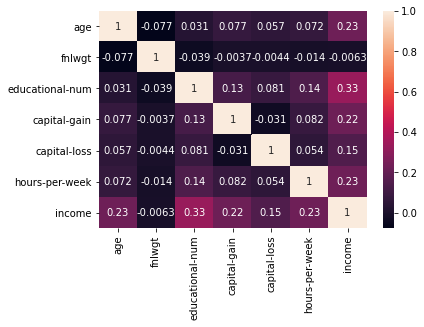

In [26]:
sns.heatmap(salary.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024907884BB0>,
      dtype=object)

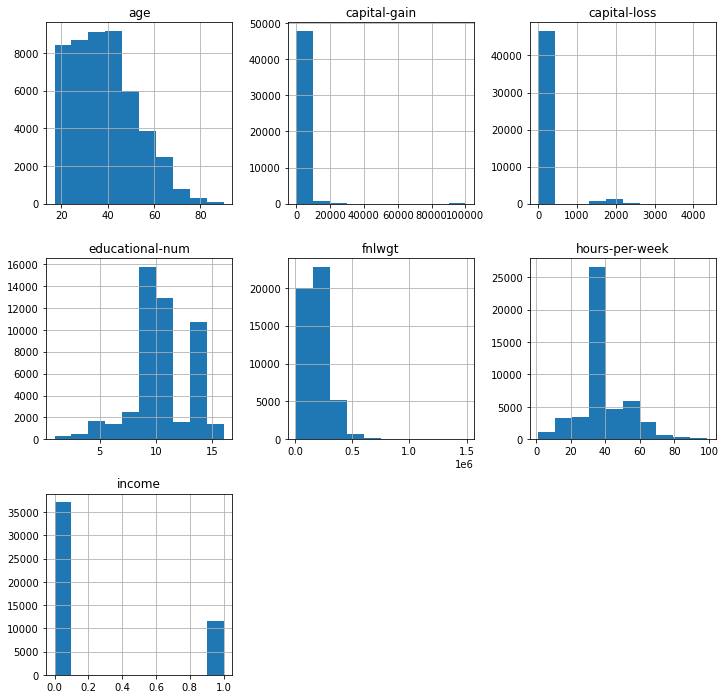

In [38]:
salary.hist(figsize = (12,12), layout = (3,3))

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

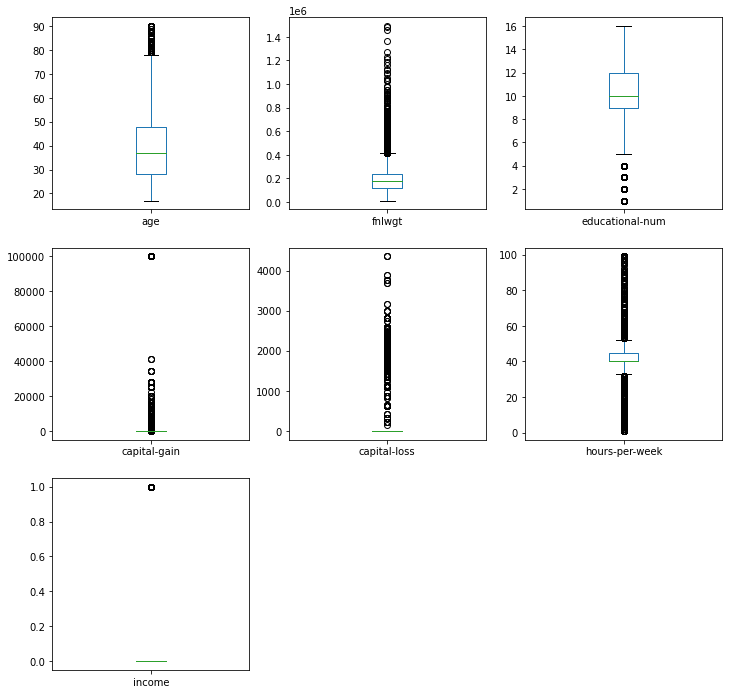

In [28]:
salary.plot(kind = 'box', figsize = (12,12), layout = (3,3), subplots = True)

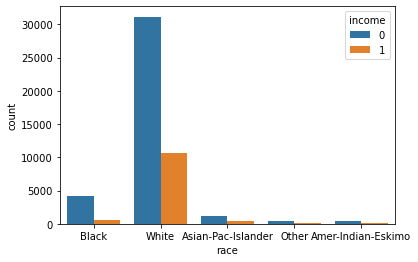

In [39]:
sns.countplot(salary['race'], hue = 'income', data = salary)

WHites have more income in both cases

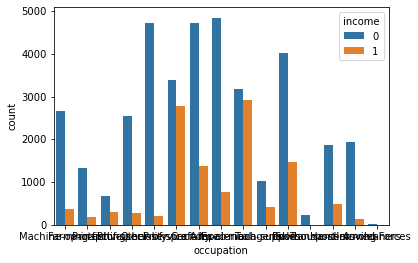

In [31]:
sns.countplot(salary['occupation'], hue = 'income', data = salary)

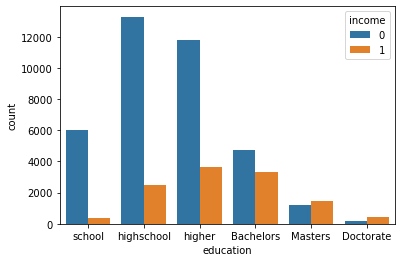

In [46]:
sns.countplot(salary['education'], hue = 'income', data = salary)

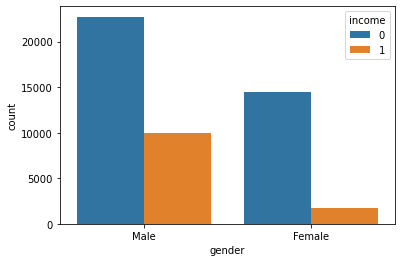

In [47]:
sns.countplot(salary['gender'], hue = 'income', data = salary)

In [48]:
salary = salary.apply(LabelEncoder().fit_transform)
salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,5,6,2,6,3,2,1,0,0,39,38,0
1,21,3,4212,4,8,3,4,0,4,1,0,0,49,38,0
2,11,1,25340,3,11,3,11,0,4,1,0,0,39,38,1
3,27,3,11201,3,9,3,6,0,2,1,98,0,39,38,1
4,1,3,5411,3,9,2,9,3,4,0,0,0,29,38,0


In [49]:
Y = salary["income"]
X = salary.drop('income', axis = 1)

In [50]:
Y.shape

(48842,)

In [51]:
Y = Y.values.reshape(-1,1)
Y.shape

(48842, 1)

In [52]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 40)

In [67]:
LgR = LogisticRegression()
LgR.fit(X_train, Y_train)

LogisticRegression()

In [68]:
predictions = LgR.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.8267931481607862

In [71]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11138
           1       0.71      0.46      0.56      3515

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.81     14653



In [72]:
svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(Y_test, predsvc))
print(confusion_matrix(Y_test, predsvc))
print(classification_report(Y_test, predsvc))

0.851361495939398
[[10541   597]
 [ 1581  1934]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11138
           1       0.76      0.55      0.64      3515

    accuracy                           0.85     14653
   macro avg       0.82      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



In [73]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc.score(X_train, Y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(Y_test, predrfc))
print(confusion_matrix(Y_test, predrfc))
print(classification_report(Y_test, predrfc))

0.8590732273254623
[[10343   795]
 [ 1270  2245]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11138
           1       0.74      0.64      0.68      3515

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.80     14653
weighted avg       0.85      0.86      0.86     14653



RandomForestClassifier gives better accuracy

In [65]:
import pickle

In [74]:
filename = 'picklesalaryrfc.pkl'
pickle.dump(svc, open(filename, 'wb'))